# Data Initialization

In [78]:
# import libraries for data management
import numpy as np 
import pandas as pd
from sklearn import preprocessing

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

<Figure size 1296x432 with 0 Axes>

In [79]:
#load dataset

data_raw = pd.read_csv('Dataset - Loans2_Cleansed.csv')

In [80]:
data_raw.head()

,Period,quick_ratio,profit_growth,management_turnover,loan_size,leverage_ratio,defaulted,sector,Environment,Social,Governance
0,1,0.29,-0.18,0.11,53.06,0.70,1,1,0.028130,0.209371,-0.719051
1,1,2.07,0.44,0.38,403.37,0.21,0,1,0.156548,0.042234,-0.854891
2,1,0.18,-0.09,0.25,106.22,0.83,1,1,-0.426099,0.384244,0.108842
3,1,0.34,0.19,0.10,452.29,0.36,1,1,-0.221770,0.299328,0.087536
4,1,0.65,0.20,0.18,441.16,0.49,0,1,-0.244648,-1.993649,-0.548874


In [81]:
# remove ESG columns

# data = data_raw.drop(columns=['sector','Environment','Social','Governance'])

data = data_raw

In [82]:
data.head()

,Period,quick_ratio,profit_growth,management_turnover,loan_size,leverage_ratio,defaulted,sector,Environment,Social,Governance
0,1,0.29,-0.18,0.11,53.06,0.70,1,1,0.028130,0.209371,-0.719051
1,1,2.07,0.44,0.38,403.37,0.21,0,1,0.156548,0.042234,-0.854891
2,1,0.18,-0.09,0.25,106.22,0.83,1,1,-0.426099,0.384244,0.108842
3,1,0.34,0.19,0.10,452.29,0.36,1,1,-0.221770,0.299328,0.087536
4,1,0.65,0.20,0.18,441.16,0.49,0,1,-0.244648,-1.993649,-0.548874


# Machine Learning (Decision Tree)

In [83]:
# import libraries for machine learning (decision tree)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text

In [84]:
# X and Y split

X = data.drop(['defaulted'],axis='columns',inplace=False)
Y = data['defaulted']

In [85]:
# Test and Train Set Split (train = 70% / test = 30%)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

### baseline

In [86]:
# Default Model (Baseline)

model = tree.DecisionTreeClassifier()
model = model.fit(train_x,train_y)
pred_y = model.predict(test_x)
pred_prob_y = model.predict_proba(test_x)

In [87]:
# Evaluation

print("MAE:",mean_absolute_error(test_y, pred_y))
print("Accuracy:",accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y))

MAE: 0.3616666666666667
Accuracy: 0.6383333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       296
           1       0.64      0.66      0.65       304

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600

Confusion Matrix: 
 [[183 113]
 [104 200]]


### overfitting check

In [88]:
# check for overfitting (max_leaf_nodes)

nodes = [2,3,4,5,6,7,8,9,10,15,20,30]
error_train = []
error_test = []

for i in nodes:
    # 70% train data
    model = tree.DecisionTreeClassifier(max_leaf_nodes = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at nodes:",nodes[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at nodes:",nodes[error_test.index(min(error_test))])

Training Set Min Error Rate: 19.286% at nodes: 30
Testing Set Error Rate: 26.000% at nodes: 5


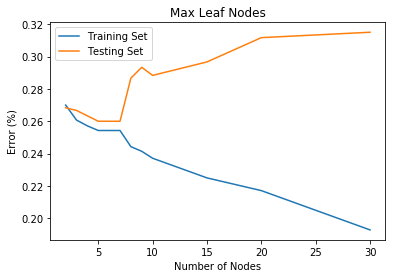

In [90]:
# range for cvgrid for leaf nodes [5-6]

plt.title('Max Leaf Nodes')
plt.plot(nodes,error_train, label='Training Set')
plt.plot(nodes,error_test, label='Testing Set')
plt.xlabel('Number of Nodes')
plt.ylabel('Error (%)')
plt.legend()

In [91]:
# check for overfitting (depth)

depths = [*range(1,21)]
error_train = []
error_test = []

for i in depths:
    # 70% train data
    model = tree.DecisionTreeClassifier(max_depth = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at depths:",depths[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at depths:",depths[error_test.index(min(error_test))])

Training Set Min Error Rate: 0.357% at depths: 20
Testing Set Error Rate: 26.500% at depths: 3


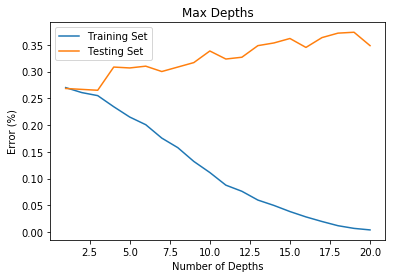

In [33]:
# range for cvgrid for max depths [2-3]

plt.title('Max Depths')
plt.plot(depths,error_train, label='Training Set')
plt.plot(depths,error_test, label='Testing Set')
plt.xlabel('Number of Depths')
plt.ylabel('Error (%)')
plt.legend()

In [92]:
# check for overfitting (min sample split)

split = [*range(2,11)]
error_train = []
error_test = []

for i in split:
    # 70% train data
    model = tree.DecisionTreeClassifier(min_samples_split = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at samples:",split[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at samples:",split[error_test.index(min(error_test))])

Training Set Min Error Rate: 0.000% at samples: 2
Testing Set Error Rate: 34.833% at samples: 8


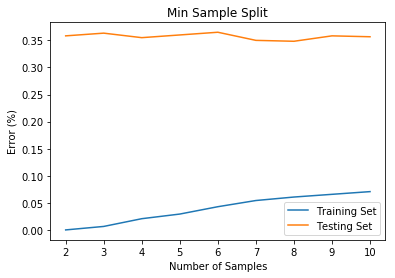

In [93]:
# range for cvgrid for min sample split [2-8]

plt.title('Min Sample Split')
plt.plot(split,error_train, label='Training Set')
plt.plot(split,error_test, label='Testing Set')
plt.xlabel('Number of Samples')
plt.ylabel('Error (%)')
plt.legend()

### grid cv

In [94]:
# define criterion

crit = ['gini','entropy']

# define max depths

depths = np.arange(2,3)

# define max leaf nodes

num_leafs = [5,6]

# define the min sample split

split = [2,3,4,5,6,7,8]

# initiate grid

try_grid = [{'criterion':crit,
            'max_depth':depths,
            'max_leaf_nodes':num_leafs,
            'min_samples_split':split,
            }]

try_grid

[{'criterion': ['gini', 'entropy'],
  'max_depth': array([2]),
  'max_leaf_nodes': [5, 6],
  'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}]

In [95]:
# DT_model = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'entropy'), param_grid=try_grid, cv=10)

DT_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=try_grid, cv=10)

In [96]:
# fit the model with a combination of the parameters, this will take a while to run

DT_model.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([2]), 'max_leaf_nodes': [5, 6],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}])

In [97]:
# find the best parameters

DT_model.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_leaf_nodes': 5,
 'min_samples_split': 2}

In [98]:
DT_model.best_score_

0.7371428571428572

In [115]:
# pick the best model

DT_model_best = tree.DecisionTreeClassifier(criterion = 'entropy',
                                            max_depth = 2, 
                                            max_leaf_nodes = 5,
                                            min_samples_split = 2,
                                            )

DT_model_best.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=5)

In [116]:
pred_y_2 = DT_model_best.predict(test_x)
pred_prob_y_2 = DT_model_best.predict_proba(test_x)

## Evaluation

In [117]:
# evaluate result

print("MAE:",mean_absolute_error(test_y, pred_y_2))
print("Accuracy:",accuracy_score(test_y, pred_y_2, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y_2))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y_2))

MAE: 0.26666666666666666
Accuracy: 0.7333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.94      0.78       296
           1       0.90      0.53      0.67       304

    accuracy                           0.73       600
   macro avg       0.78      0.74      0.72       600
weighted avg       0.78      0.73      0.72       600

Confusion Matrix: 
 [[279  17]
 [143 161]]


In [118]:
text_representation = tree.export_text(DT_model_best)
print(text_representation)

|--- feature_1 <= 0.37
|   |--- feature_2 <= 0.13
|   |   |--- class: 1
|   |--- feature_2 >  0.13
|   |   |--- class: 0
|--- feature_1 >  0.37
|   |--- feature_8 <= -1.83
|   |   |--- class: 0
|   |--- feature_8 >  -1.83
|   |   |--- class: 0



In [119]:
# Feature 7, 4, 12 are the most informative features according to the decision tree text representation.

print('The most informative features are {}, {} and {}'.format(train_x.columns[1], train_x.columns[2],train_x.columns[8]))

The most informative features are quick_ratio, profit_growth and Social


### Precision-Recall Curve

In [104]:
# array the test_y

test_y_array = np.array(test_y)

In [105]:
# precision-recall curve

precision1, recall1, threshold1 = precision_recall_curve(test_y_array, pred_prob_y[:,1])
precision2, recall2, threshold2 = precision_recall_curve(test_y_array, pred_prob_y_2[:,1])

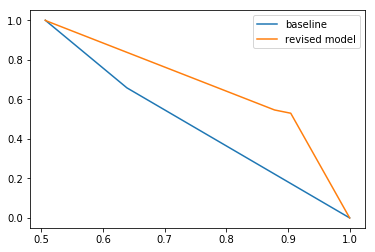

In [106]:
plt.plot(precision1,recall1, label='baseline') #baseline
plt.plot(precision2,recall2, label='revised model') #cvgrid new model
plt.legend()

### ROC / AUC

In [107]:
# ROC

fpr1, tpr1, threshold3 = metrics.roc_curve(test_y_array, pred_prob_y[:,1],pos_label=1)
fpr2, tpr2, threshold4 = metrics.roc_curve(test_y_array, pred_prob_y_2[:,1],pos_label=1)

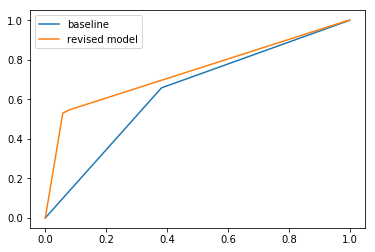

In [108]:
plt.plot(fpr1,tpr1, label='baseline') #baseline
plt.plot(fpr2,tpr2, label='revised model') #cvgrid new model
plt.legend()

In [109]:
# AUC - baseline

metrics.auc(fpr1, tpr1)

0.6380689900426743

In [110]:
# AUC - revised model

metrics.auc(fpr2, tpr2)

0.7398537517780938